In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 500)

In [38]:
dfTrain = pd.read_csv('train.csv', delimiter=',')
dfTest = pd.read_csv('test.csv', delimiter=',')

In [39]:
dfTest["SalePrice"]=np.nan

In [40]:
dfGlobal=pd.concat([dfTrain,dfTest])
iDs=dfGlobal["Id"]
dfGlobal=dfGlobal.drop(columns=["Id"])

In [41]:
def prepareVariablesExplicatives(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    colonnesNumeriques=list(set(df.select_dtypes(include=numerics).columns)-set(["SalePrice"]))
    display(df[colonnesNumeriques].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8))
    dfFiltre=df[colonnesNumeriques].fillna(0)
    dfFiltre=pd.concat([df[["SalePrice"]],dfFiltre], axis=1)
    colonnesAutres=set(df.columns)-set(list(colonnesNumeriques)+["SalePrice"])
    dfNum=dfFiltre
    for c in colonnesAutres:
        dfNum=pd.concat([dfNum,pd.get_dummies(df[c])],axis=1)
    return dfNum    

array([[<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': '3SsnPorch'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'OpenPorchSF'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'MiscVal'}>,
        <Axes: title={'center': 'EnclosedPorch'}>],
       [<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'GarageYrBlt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'GarageCars'}>],
       [<Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'ScreenPorch'}>,
        <Axes: title={'center':

,SalePrice,GrLivArea,BsmtFullBath,3SsnPorch,BedroomAbvGr,TotRmsAbvGrd,1stFlrSF,Fireplaces,OpenPorchSF,LotFrontage,...,Fa,Gd,Po,TA,Gar2,Othr,Shed,TenC,Grvl,Pave
0,208500.0,1710,1.0,0,3,8,856,0,61,65.0,...,False,False,False,False,False,False,False,False,False,False
1,181500.0,1262,0.0,0,3,6,1262,1,0,80.0,...,False,False,False,False,False,False,False,False,False,False
2,223500.0,1786,1.0,0,3,6,920,1,42,68.0,...,False,False,False,False,False,False,False,False,False,False
3,140000.0,1717,1.0,0,3,7,961,1,35,60.0,...,False,True,False,False,False,False,False,False,False,False
4,250000.0,2198,1.0,0,4,9,1145,1,84,84.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,NaN,1092,0.0,0,3,5,546,0,0,21.0,...,False,True,False,False,False,False,False,False,False,False
1455,NaN,1092,0.0,0,3,6,546,0,24,21.0,...,False,False,False,True,False,False,False,False,False,False
1456,NaN,1224,1.0,0,4,7,1224,1,0,160.0,...,False,False,False,False,False,False,False,False,False,False
1457,NaN,970,0.0,0,3,6,970,0,32,62.0,...,False,False,False,True,False,False,True,False,False,False


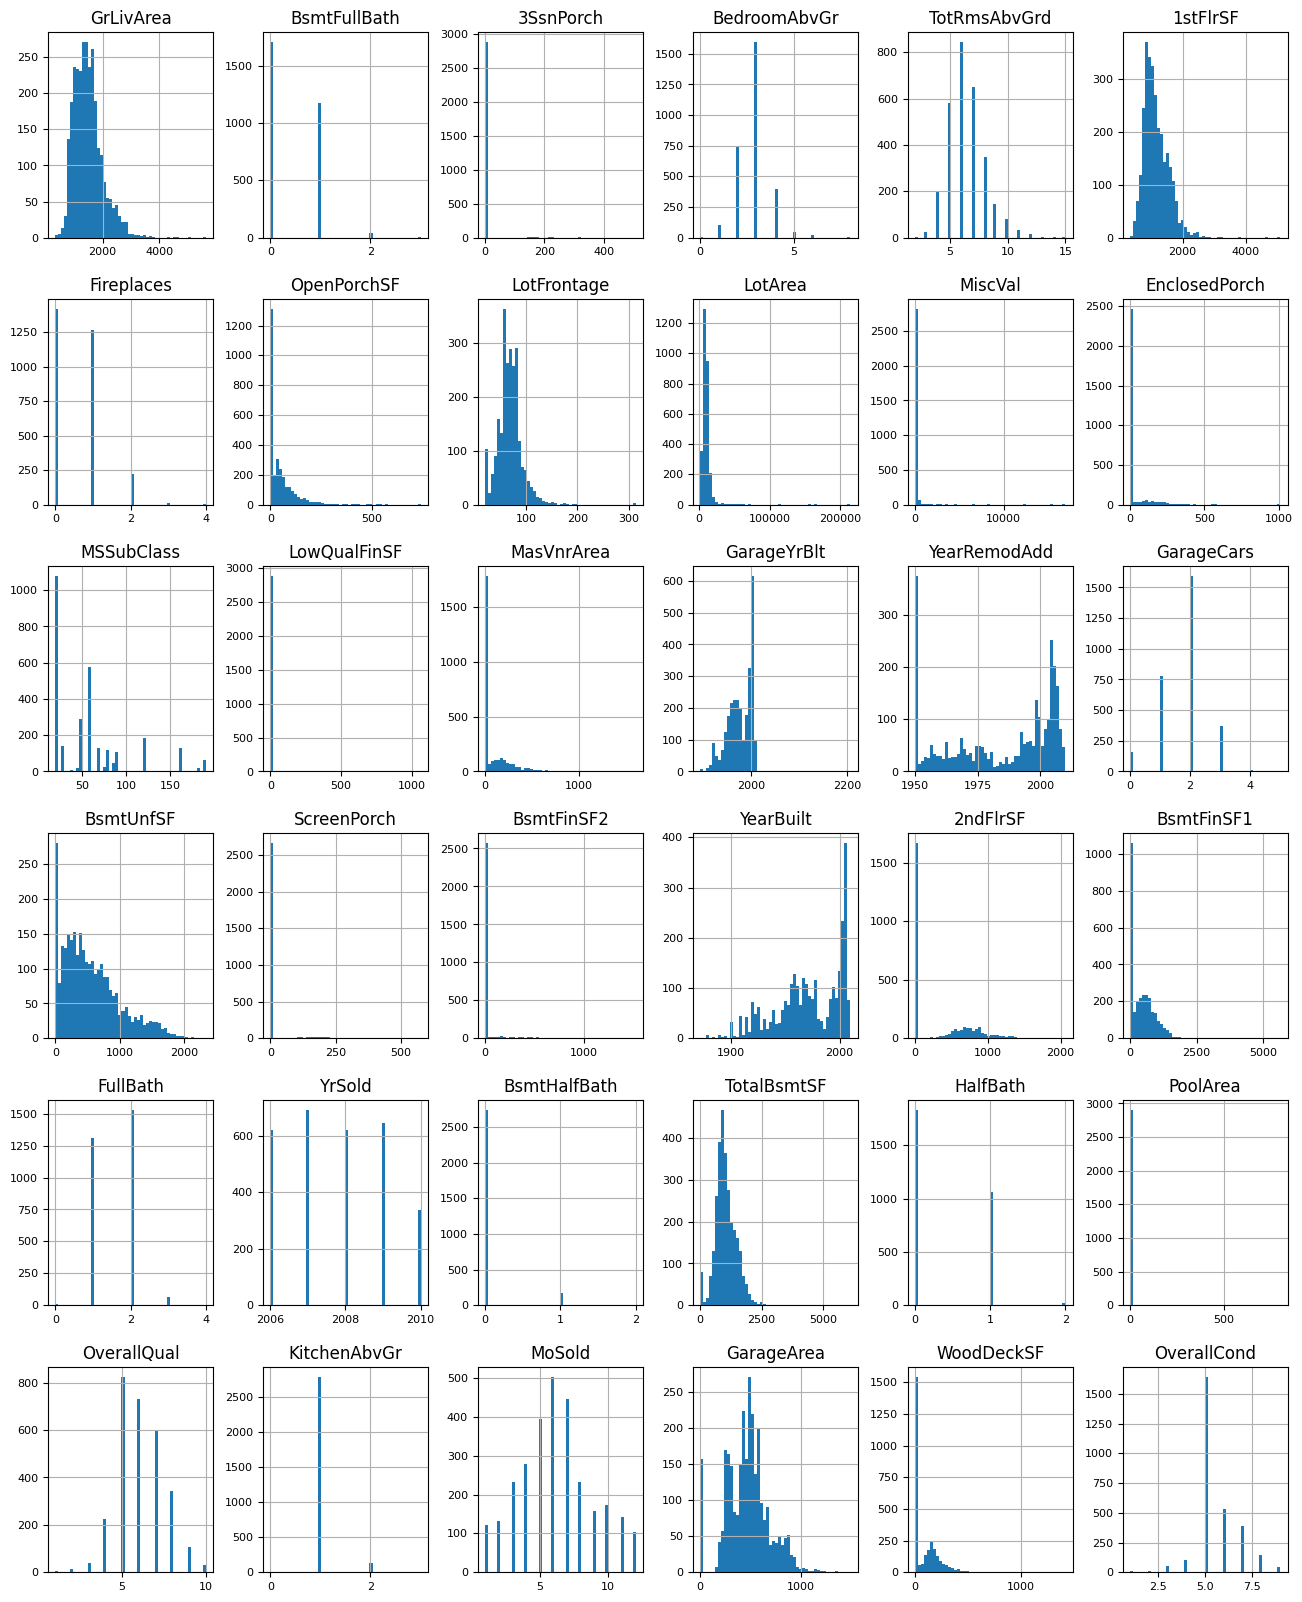

In [42]:
dfNumGlobal=prepareVariablesExplicatives(dfGlobal)
dfNumGlobal

In [43]:
dfNumFit=dfNumGlobal.dropna(subset=["SalePrice"])
dfNumFit

,SalePrice,GrLivArea,BsmtFullBath,3SsnPorch,BedroomAbvGr,TotRmsAbvGrd,1stFlrSF,Fireplaces,OpenPorchSF,LotFrontage,...,Fa,Gd,Po,TA,Gar2,Othr,Shed,TenC,Grvl,Pave
0,208500.0,1710,1.0,0,3,8,856,0,61,65.0,...,False,False,False,False,False,False,False,False,False,False
1,181500.0,1262,0.0,0,3,6,1262,1,0,80.0,...,False,False,False,False,False,False,False,False,False,False
2,223500.0,1786,1.0,0,3,6,920,1,42,68.0,...,False,False,False,False,False,False,False,False,False,False
3,140000.0,1717,1.0,0,3,7,961,1,35,60.0,...,False,True,False,False,False,False,False,False,False,False
4,250000.0,2198,1.0,0,4,9,1145,1,84,84.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000.0,1647,0.0,0,3,7,953,1,40,62.0,...,False,False,False,False,False,False,False,False,False,False
1456,210000.0,2073,1.0,0,3,7,2073,2,0,85.0,...,False,False,False,True,False,False,False,False,False,False
1457,266500.0,2340,0.0,0,4,9,1188,2,60,66.0,...,False,False,False,False,False,False,True,False,False,False
1458,142125.0,1078,1.0,0,2,5,1078,0,0,68.0,...,False,True,False,False,False,False,False,False,False,False


## Ridge regression 

In [44]:
# from sklearn import linear_model
# X = dfNumFit.values[:,1:]
# y = dfNumFit.values[:,:1]
# reg = linear_model.Ridge(alpha=.5)
# reg.fit(X,y)
# display(reg.score(X,y))


## Lasso model 

In [45]:
# from sklearn import linear_model
# X = dfNumFit.values[:,1:]
# y = dfNumFit.values[:,:1]
# reg = linear_model.Lasso(alpha=0.1)
# reg.fit(X,y)
# display(reg.score(X,y))

## LARS lasso model 

In [46]:
# from sklearn import linear_model
# X = dfNumFit.values[:,1:]
# y = dfNumFit.values[:,:1]
# reg = linear_model.ElasticNet(alpha=0.08, l1_ratio=0.5)
# reg.fit(X,y)
# display(reg.score(X,y))

# avec regression linéaire

In [47]:
# from sklearn.linear_model import LinearRegression
# X = dfNumFit.values[:,1:]
# y = dfNumFit.values[:,:1]
# reg = LinearRegression().fit(X, y)
# display(reg.score(X, y))

In [49]:
# plt.plot(abs(y-reg.predict(X)))

In [52]:
# mae = abs(y-reg.predict(X)).mean()
# print("The mean absolute error on training set: {:.4f}".format(mae))

In [53]:
# dfNumTest=dfNumGlobal

In [54]:
# predictions=reg.predict(dfNumTest.values[:,1:])
# predictions.squeeze()

# Avec xgboost

In [56]:
import xgboost as xgb
reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=500,
    n_estimators=500
)

In [57]:
X = dfNumFit.values[:,1:]
X = (X-X.min(axis=0)) / (X.max(axis=0)-X.min(axis=0))
y = dfNumFit.values[:,:1]

reg.fit(X, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=500, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
mae = abs(y-reg.predict(X)).mean()
print("The mean absolute error on training set: {:.4f}".format(mae))

The mean absolute error on training set: 81030.4835


# Soumission

In [59]:
dfSoumission=pd.DataFrame({"Id":iDs, "SalePrice":list(predictions.squeeze())})
dfSoumission

,Id,SalePrice
0,1,208829.851072
1,2,205624.051682
2,3,205999.576841
3,4,166560.887457
4,5,292407.137337
...,...,...
1454,2915,84406.054418
1455,2916,80590.106380
1456,2917,175757.909182
1457,2918,114751.877089


In [ ]:
dfSoumission=dfSoumission[dfSoumission["Id"].isin(dfTest.Id.values)]

In [ ]:
dfSoumission.to_csv("my_submission3.csv", sep=',', index=False)